In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

# import dataset
salaries = pd.read_csv('salaries_1985to2018.csv')
players = pd.read_csv('players.csv')

In [2]:
# get dimensions of the data
print(players.shape)
print(salaries.shape)

(4685, 24)
(14163, 7)


In [3]:
# get data types
print(players.dtypes, '\n')
print(salaries.dtypes)

_id             object
birthDate       object
birthPlace      object
career_AST     float64
career_FG%      object
career_FG3%     object
career_FT%      object
career_G         int64
career_PER      object
career_PTS     float64
career_TRB      object
career_WS       object
career_eFG%     object
college         object
draft_pick      object
draft_round     object
draft_team      object
draft_year      object
height          object
highSchool      object
name            object
position        object
shoots          object
weight          object
dtype: object 

league          object
player_id       object
salary           int64
season          object
season_end       int64
season_start     int64
team            object
dtype: object


In [4]:
# Merge the two dataframes
df = pd.merge(salaries, players, left_on='player_id', right_on='_id', how='left')
df.drop('_id', axis=1, inplace=True)

In [5]:
filtered_df = df[['season', 'salary', 'position', 'name']]

# Extract the start year of the season and convert it to datetime
filtered_df['season'] = pd.to_datetime(filtered_df['season'].str.split('-', expand=True)[0], format='%Y')

/var/folders/zh/wdgtpnt12x3fw44lgg__jbh40000gn/T/ipykernel_41238/2960233061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['season'] = pd.to_datetime(filtered_df['season'].str.split('-', expand=True)[0], format='%Y')


In [6]:
# Check if the filtering worked
filtered_df.head()

,season,salary,position,name
0,1990-01-01,395000,Power Forward,Alaa Abdelnaby
1,1991-01-01,494000,Power Forward,Alaa Abdelnaby
2,1992-01-01,500000,Power Forward,Alaa Abdelnaby
3,1993-01-01,805000,Power Forward,Alaa Abdelnaby
4,1994-01-01,650000,Power Forward,Alaa Abdelnaby


In [7]:
# check for NaN values
for i in filtered_df.columns:
    print(i, filtered_df[i].isnull().sum())

season 0
salary 0
position 0
name 0


In [8]:
# Sort the DataFrame by 'salary' column in ascending order
df_sorted = filtered_df.sort_values(by='salary')

# View the first 10 rows of the sorted DataFrame
lowest_salaries = df_sorted.head(10)

# Display the first 10 rows of the lowest salaries
print(lowest_salaries)


          season  salary                         position             name
11231 1999-01-01    2706                    Small Forward     Jason Sasser
9561  1999-01-01    2853   Shooting Guard and Point Guard      Kevin Ollie
4716  1999-01-01    4529  Power Forward and Small Forward   Steve Goodrich
13922 1999-01-01    4529                           Center    Trevor Winter
1463  1999-01-01    4529   Point Guard and Shooting Guard       Ira Bowman
6377  2017-01-01    4608                    Power Forward  Amile Jefferson
6162  2017-01-01    4608                      Point Guard    Aaron Jackson
14064 1992-01-01    5000                    Power Forward    Howard Wright
1765  1997-01-01    5000                      Point Guard     Rick Brunson
6954  1999-01-01    5000                           Center  Jonathan Kerner


In [9]:
# Check out all the salary values
# for i in filtered_df['salary'].sort_values(ascending=True):
#     print(i)

In [10]:
# Mapping dictionary to shorten positions
position_mapping = {
    'Point Guard': 'PG',
    'Shooting Guard': 'SG',
    'Center and Small Forward and Power Forward': 'C',
    'Power Forward and Small Forward': 'PF',
    'Center': 'C',
    'Power Forward': 'PF',
    'Shooting Guard and Small Forward': 'SG',
    'Power Forward and Center': 'PF/C',
    'Shooting Guard and Point Guard': 'SG/PG',
    'Point Guard and Shooting Guard': 'PG/SG',
    'Small Forward': 'SF',
    'Shooting Guard and Small Forward and Point Guard': 'SG/SF/PG',
    'Small Forward and Shooting Guard': 'SF/SG',
    'Point Guard and Power Forward and Small Forward and Shooting Guard': 'PG/PF/SF/SG',
    'Small Forward and Power Forward': 'SF/PF',
    'Center and Power Forward': 'C/PF',
    'Small Forward and Power Forward and Shooting Guard': 'SF/PF/SG',
    'Shooting Guard and Small Forward and Power Forward': 'SG/SF/PF',
    'Shooting Guard and Point Guard and Small Forward': 'SG/PG/SF',
    'Power Forward and Shooting Guard': 'PF/SG',
    'Small Forward and Shooting Guard and Power Forward': 'SF/SG/PF',
    'Power Forward and Small Forward and Shooting Guard': 'PF/SF/SG',
    'Small Forward and Shooting Guard and Point Guard': 'SF/SG/PG',
    'Small Forward and Center and Power Forward': 'SF/C/PF',
    'Small Forward and Power Forward and Center': 'SF/PF/C',
    'Small Forward and Point Guard and Shooting Guard': 'SF/PG/SG',
    'Power Forward and Center and Small Forward': 'PF/C/SF',
    'Small Forward and Center': 'SF/C',
    'Center and Power Forward and Small Forward': 'C/PF/SF',
    'Power Forward and Shooting Guard and Small Forward': 'PF/SG/SF',
    'Shooting Guard and Power Forward and Small Forward': 'SG/PF/SF',
    'Point Guard and Shooting Guard and Small Forward': 'PG/SG/SF',
    'Power Forward and Small Forward and Center': 'PF/SF/C',
    'Point Guard and Small Forward and Shooting Guard': 'PG/SF/SG',
    'Point Guard and Small Forward': 'PG/SF'
}

# Map the positions using the mapping dictionary
filtered_df['position'] = filtered_df['position'].map(position_mapping)

/var/folders/zh/wdgtpnt12x3fw44lgg__jbh40000gn/T/ipykernel_41238/1000026021.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['position'] = filtered_df['position'].map(position_mapping)


In [11]:
print(filtered_df.dtypes)

season      datetime64[ns]
salary               int64
position            object
name                object
dtype: object


In [12]:
filtered_df.head()

,season,salary,position,name
0,1990-01-01,395000,PF,Alaa Abdelnaby
1,1991-01-01,494000,PF,Alaa Abdelnaby
2,1992-01-01,500000,PF,Alaa Abdelnaby
3,1993-01-01,805000,PF,Alaa Abdelnaby
4,1994-01-01,650000,PF,Alaa Abdelnaby


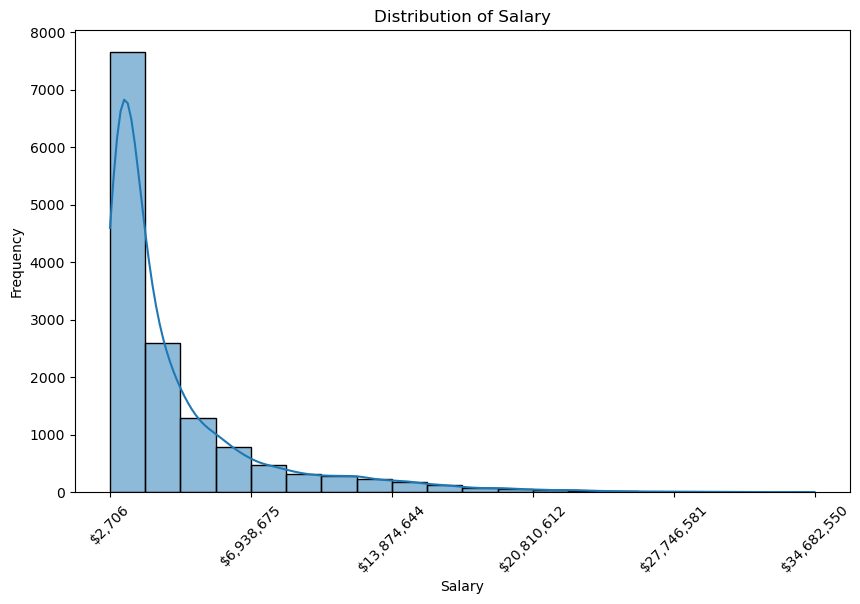

In [13]:

# Histogram for salary
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='salary', bins=20, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Specify the tick marks and labels for x-axis
tick_values = np.linspace(df['salary'].min(), df['salary'].max(), num=6)  # Adjust num=6 as needed
tick_labels = ['${:,.0f}'.format(x) for x in tick_values]  # Format tick labels as currency
plt.xticks(tick_values, tick_labels, rotation=45)  # Rotate labels for better readability

plt.show()


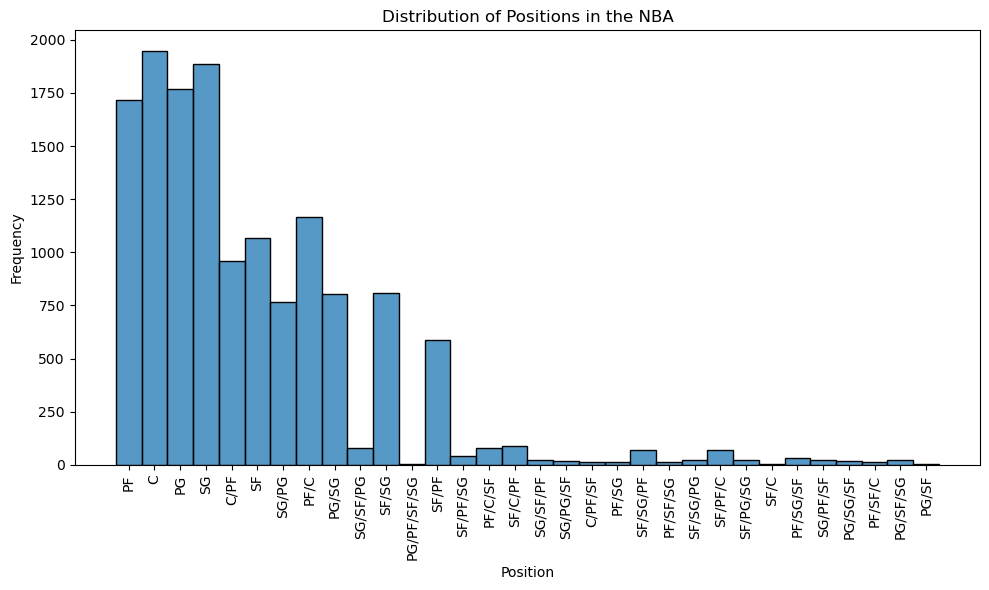

In [14]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='position', bins=len(filtered_df['position'].unique()), discrete=True)
plt.title('Distribution of Positions in the NBA')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

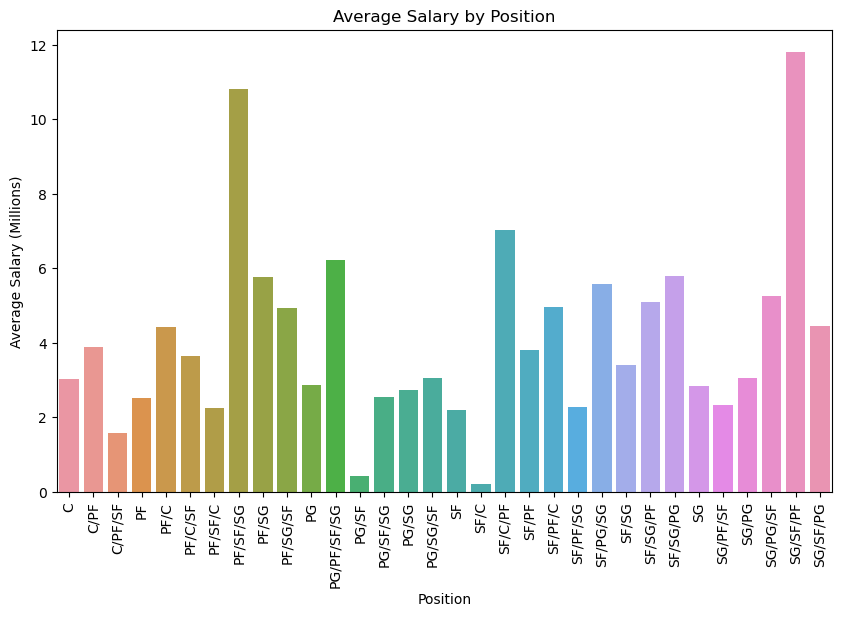

In [15]:
# Grouping the DataFrame by 'position' and calculating the mean salary for each position over time
average_salary_by_position = filtered_df.groupby('position')['salary'].mean().reset_index()

# Convert salary to millions
average_salary_by_position['salary'] /= 1e6  # dividing by 1,000,000 to convert to millions

# Plotting the average salaries by position
plt.figure(figsize=(10, 6))
sns.barplot(data=average_salary_by_position, x='position', y='salary')
plt.title('Average Salary by Position')
plt.xlabel('Position')
plt.ylabel('Average Salary (Millions)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


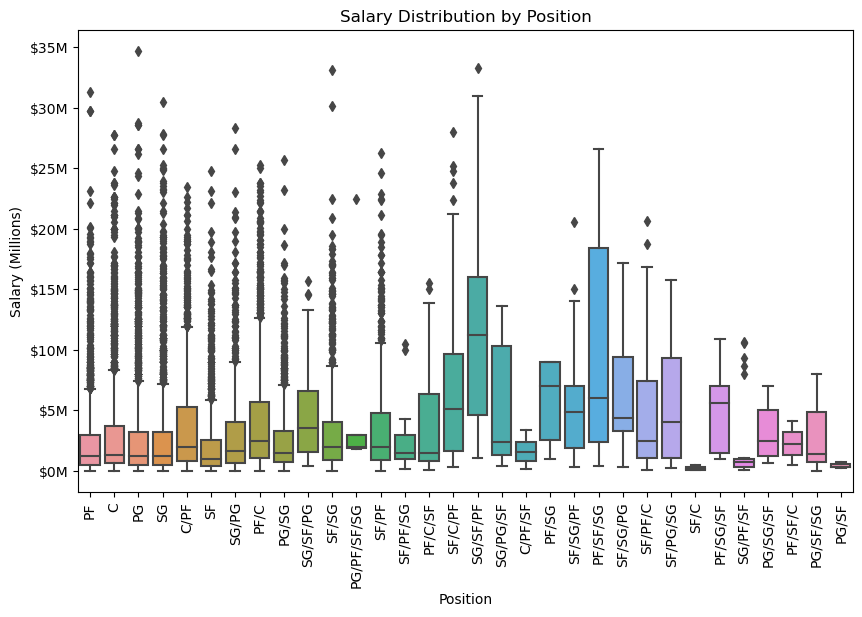

In [16]:
# Create the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=filtered_df, x='position', y='salary')

# Formatting y-axis labels to display in millions
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.0f}M'.format(x / 1e6)))

plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary (Millions)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

/var/folders/zh/wdgtpnt12x3fw44lgg__jbh40000gn/T/ipykernel_41238/4018216216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['season'] = pd.to_datetime(filtered_df['season'])


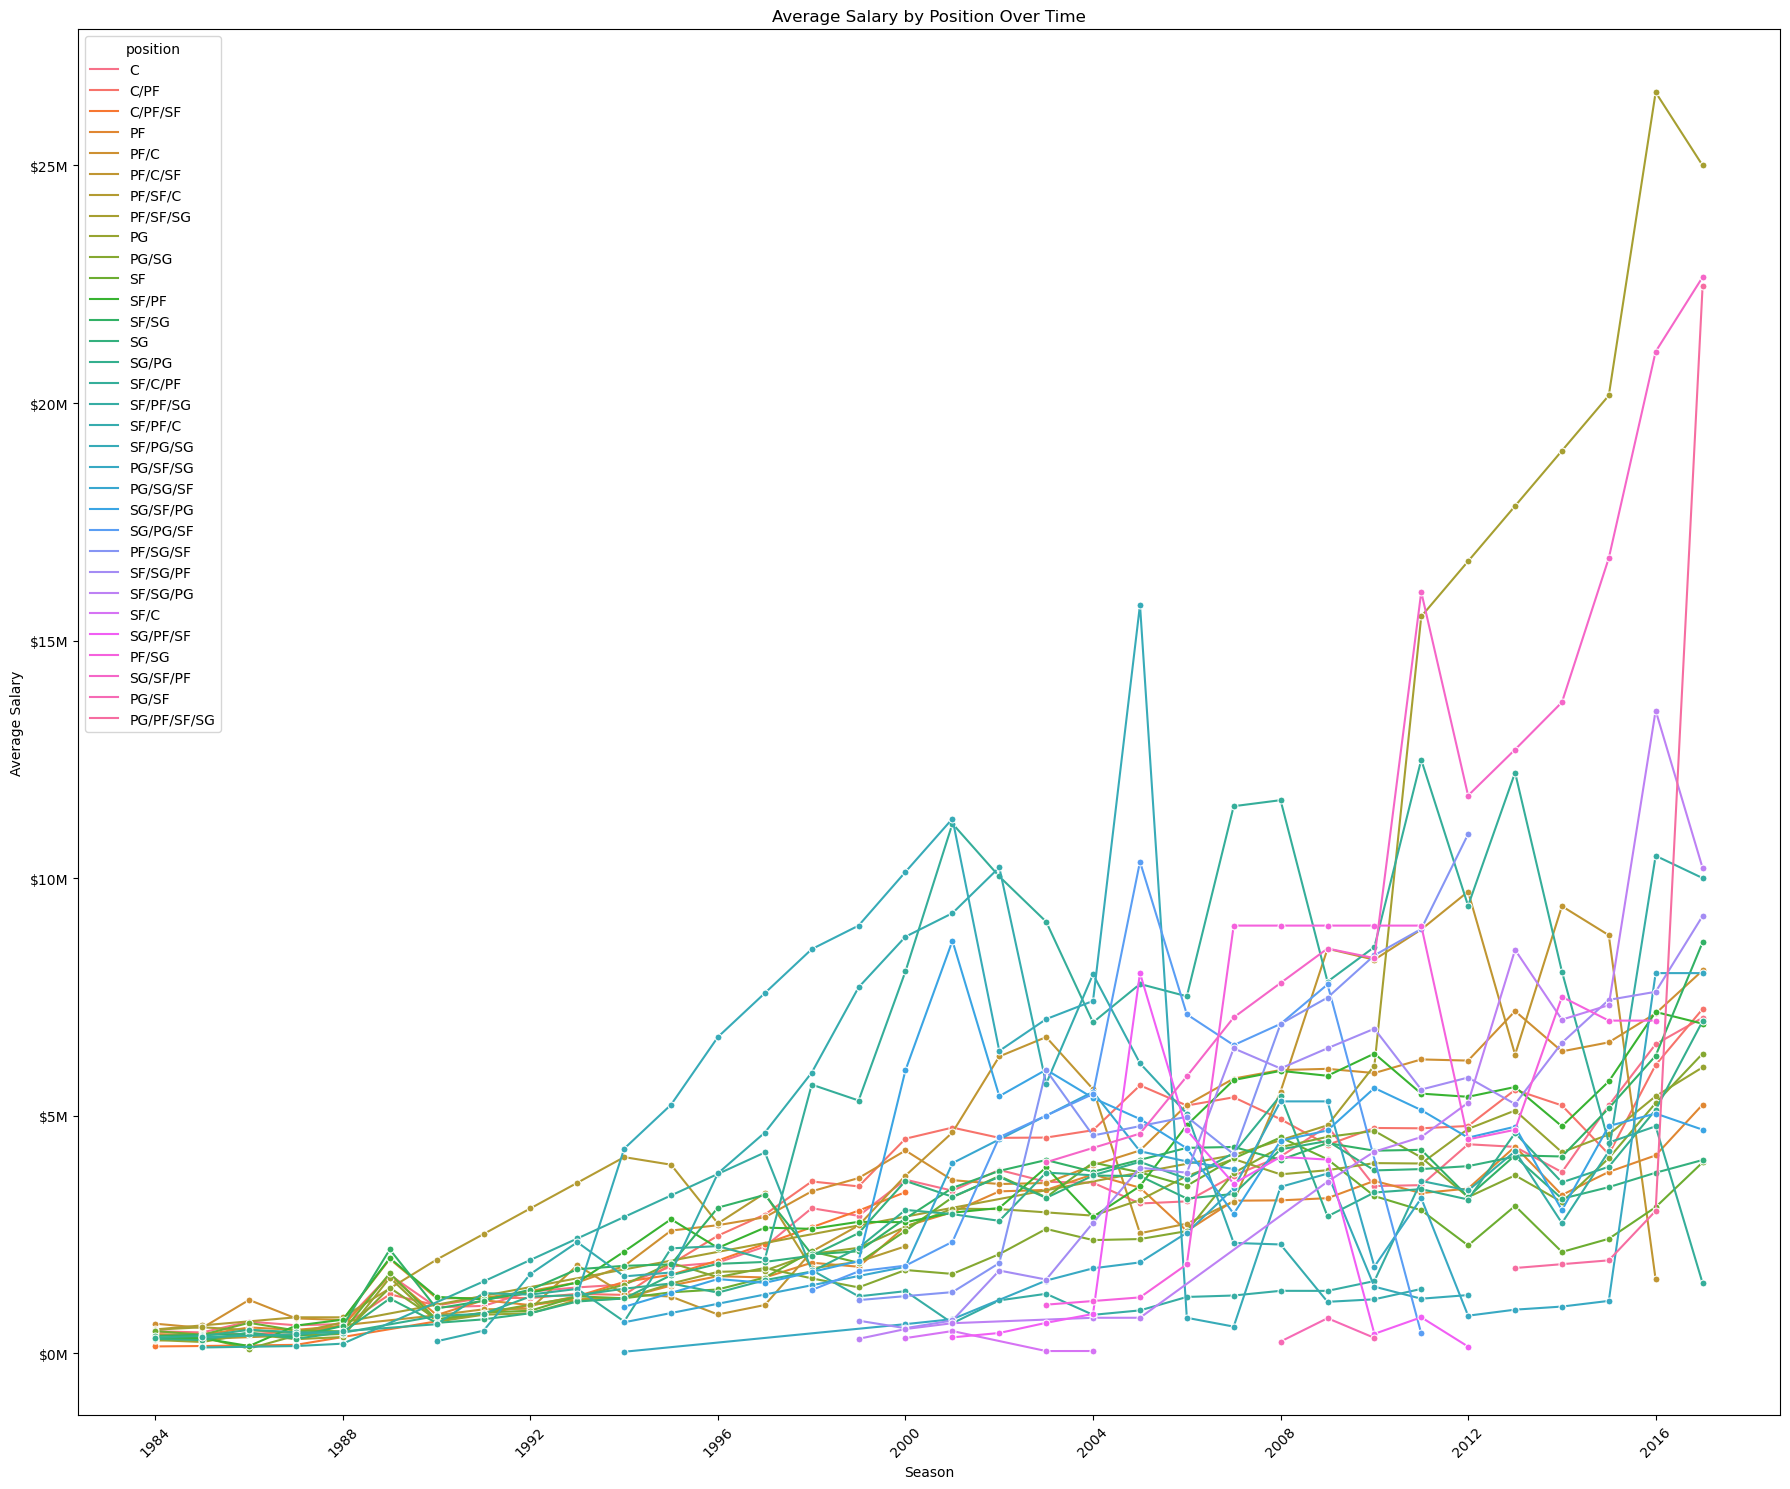

In [17]:
# Convert 'season' column to datetime if it's not already in datetime format
filtered_df['season'] = pd.to_datetime(filtered_df['season'])

# Grouping the DataFrame by 'season' and 'position' and calculating the mean salary for each group
average_salary_by_position_over_time = filtered_df.groupby(['season', 'position'])['salary'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(18, 15))
ax = sns.lineplot(data=average_salary_by_position_over_time, x='season', y='salary', hue='position', marker='o', markersize=5)

# Formatting y-axis labels to display in millions
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.0f}M'.format(x / 1e6)))

plt.title('Average Salary by Position Over Time')
plt.xlabel('Season')
plt.ylabel('Average Salary')


plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [18]:
# Make a copy of the original DataFrame
filtered_df_copy = filtered_df.copy()

# One-hot encode the 'position' column
filtered_df_copy = pd.get_dummies(filtered_df_copy, columns=['position'])

# Filter data for guard positions (PG, SG)
guard_df = filtered_df_copy[(filtered_df_copy['position_SG'] == 1) | (filtered_df_copy['position_PG'] == 1)]

relevant_features = filtered_df_copy.drop(['salary', 'name'], axis=1)

# Prepare data: Extract relevant features
X = relevant_features 
X.loc[:, 'season'] = pd.to_datetime(X['season']).dt.year  # Extract year from season using .loc
y = filtered_df_copy['salary']  # Target variable: salary

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
coefficient = model.coef_[0]  # Coefficient for season year

# Check if coefficient is positive
if coefficient > 0:
    print(f"There is a positive correlation of {coefficient} between season year and salary for guard positions.")
else:
    print("There is no positive correlation between season year and salary for guard positions.")


There is a positive correlation of 159144.75131608814 between season year and salary for guard positions.


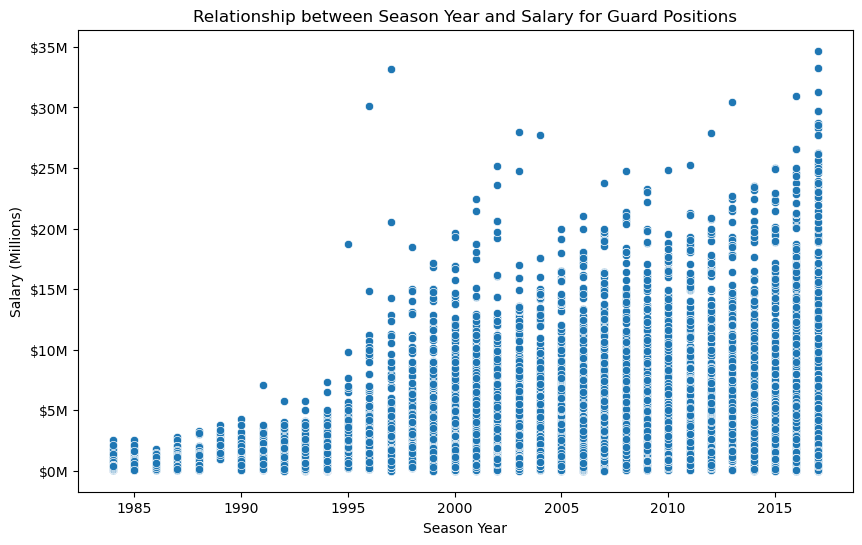

In [19]:
# Convert salary to millions
y_millions = y / 1_000_000

# Visualization
plt.figure(figsize=(10, 6))


sns.scatterplot(x=X['season'], y=y_millions)
plt.title('Relationship between Season Year and Salary for Guard Positions')
plt.xlabel('Season Year')
plt.ylabel('Salary (Millions)')

# Format y-axis labels to display in millions
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}M'))

plt.show()
